<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/Proyecto_final_finalMartin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Vision_producto](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

#**PROYECTO INTEGRADOR FINAL: BANK TELEMARKETING**
El objetivo es predecir si un cliente se suscribirá a un depósito a plazo fijo que se le ofrece mediante una campaña de telemarketing.

Para ello se propone crear un modelo de clasificación de aprendizaje automático con la finalidad poder usarlo en una población definida por un banco minorista de Portugal en el contexto de la recesión global del año 2008.
[Link Product Vision Board](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

## **DESCRIPCION DE LOS DATOS**
**1. Información Importante:**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder saber si el cliente se suscribiría a un depósito a plazo fijo.





**2. Objetivo:**

El objetivo es diseñar un modelo de clasificación para predecir si el cliente suscribirá un depósito a plazo (variable y).

**3. Número de Instancias:**

45211 for bank-full.csv (4521 for bank.csv)

**4. Número de atributos:**

 16 varaibles de entrada

 1 variable de salida o variable Objetivo


**5. Información sobre las Variables:**

**Variables de Entrada**
1. age: Edad del cliente (numérico).

2. job: Tipo de empleo del cliente (categórico): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".

3. marital: Estado civil del cliente (categórico): "married", "divorced", "single" (Nota: "divorced" significa divorciado o viudo).

4. education: Nivel de educación del cliente (categórico): "unknown", "secondary", "primary", "tertiary".

5. default: ¿Tiene el cliente crédito en mora? (binario): "yes", "no".

6. balance: Saldo promedio anual, en euros, del cliente (numérico).

7. housing: ¿Tiene el cliente un préstamo hipotecario? (binario): "yes", "no".

8. loan: ¿Tiene el cliente un préstamo personal? (binario): "yes", "no".

9. contact: Tipo de comunicación de contacto (categórico) relacionado con el último contacto de la campaña actual: "unknown", "telephone", "cellular".

10. day: Último día del mes en que se realizó el último contacto (numérico).

11. month: Último mes del año en que se realizó el último contacto (categórico): "jan", "feb", "mar", ..., "nov", "dec".

12. duration: Duración del último contacto en segundos (numérico).

13. campaign: Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

14. pdays: Número de días transcurridos desde el último contacto de una campaña anterior con el cliente (numérico, -1 significa que el cliente no fue contactado anteriormente).

15. previous: Número de contactos realizados antes de esta campaña y para este cliente (numérico).

16. poutcome: Resultado de la campaña de marketing anterior (categórico): "unknown", "other", "failure", "success".

**Variable objetivo (target deseado):**

17. y: ¿El cliente ha suscrito un depósito a plazo? (binario): "yes", "no".



**6. Missing Attribute Values:**

None


In [2]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=630f52845b91de16e93009bd33046a901e71a9a83ef6aee31b271ffce424e93b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

# 1. Explorar los datos para obtener información

In [3]:
mainpath = "bank_full.csv"
data = pd.read_csv(mainpath,sep=";")


In [4]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observaciones:**

La muestra tiene:

45,211 instancias

17 variables ( columnas).

  - 10 variables categóricas

  - 7 variables numéricas

La variable Objetivo es categorica binaria: yes / no

No hay valores missing


# 1.1 Análisis de la Variable Objetivo (y)
¿El cliente invirtió en un depósito a plazo fijo? : yes / no


In [6]:
#La variable Objetivo de tipo categórica se mapea en 0=no , yes=1
data["y"].unique()
data["y"]=data["y"].map({'no':0, 'yes':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='count'>

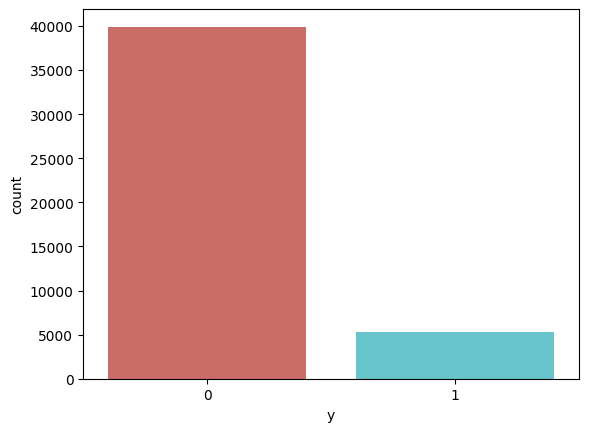

In [7]:
# Analizando la distribución de la variable objetivo.
sns.countplot(x='y', data = data, palette = 'hls')

In [8]:
#Media de la variable objetivo

print("Media de Y: ", data.y.mean(). round(3))
# Distribución de frecuencias de las respuestas a la suscripción de depósitos a plazo fijo (y)
frecuencias = data.groupby('y').agg({'y': ['count',  lambda x: 100*x.size/len(data)]})
frecuencias.columns = ['fi', 'hi%']
print("\nDistribución de frecuencias")
frecuencias


Media de Y:  0.117

Distribución de frecuencias


,fi,hi%
y,,
0,39922,88.30152
1,5289,11.69848


**Se observó:**

1. *La variable objetivo es Categórica binaria.*  Por lo tanto, para el modelo de clasificación se codificó así:

> 0='no'   No se suscribió a un depósito a plazo fijo.

> 1='yes'  Si se suscribió a un depósito a plazo fijo.

2. La Distribucipon de frecuencias de la variable objetiva nos muestra una data desbalanceada. 88.3% de la muestra no se suscribió a un depósito a plazo fijo. Esto se puede explicar por la desconfianza en el banco minorista dada la crisis del sistema financiero de Portugal el contexto de la crisis financiera del 2008.

3. La media 0.117, nos indica que en promedio se suscribieron 12 de cada 100. Lo cual es bajo dado el desbalanceo de la data.


# 1.1. Análisis de las variables categóricas

In [9]:
data.groupby(['y','pdays']).size()

y  pdays
0  -1       33570
    1           9
    2          35
    3           1
    4           1
            ...  
1   804         1
    805         1
    828         1
    842         1
    854         1
Length: 914, dtype: int64

In [164]:
# Distribución de frecuencias de las respuestas a la suscripción de depósitos a plazo fijo (y)
frecuencias2 = data.groupby('pdays').agg({'pdays': ['count',  lambda x: 100*x.size/len(data)]})
frecuencias2.columns = ['fi', 'hi%']
print("\nDistribución de frecuencias")
frecuencias2


Distribución de frecuencias


,fi,hi%
pdays,,
-1,36954,81.736745
1,15,0.033178
2,37,0.081838
3,1,0.002212
4,2,0.004424
...,...,...
838,1,0.002212
842,1,0.002212
850,1,0.002212


In [10]:
# Lista de variables categóricas
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()

print("Lista de Variables Categóricas: ",variables_categoricas,"\n")
# Seleccionamos un subconjunto del dataset que sólo incluya las variables categóricas.
categorical_columns =data.select_dtypes(include=['object'])
categorical_columns.describe().transpose()

Lista de Variables Categóricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 



,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


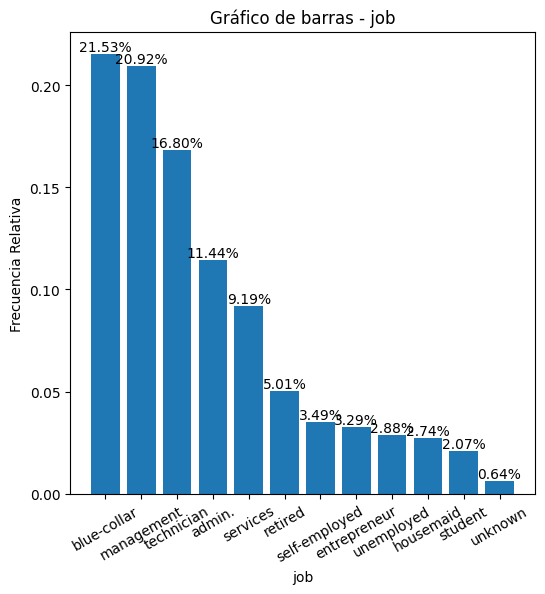

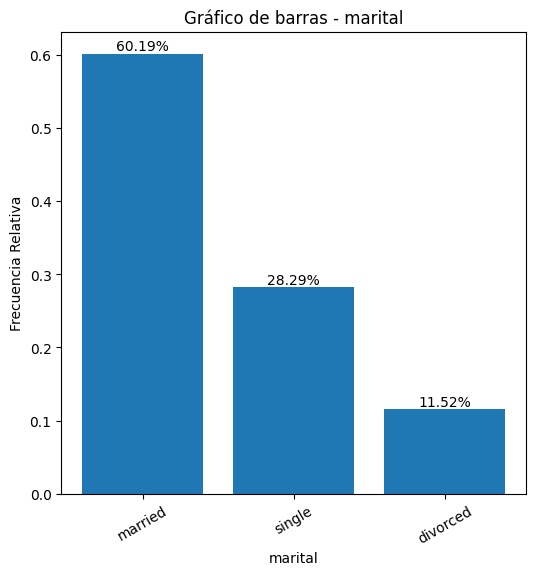

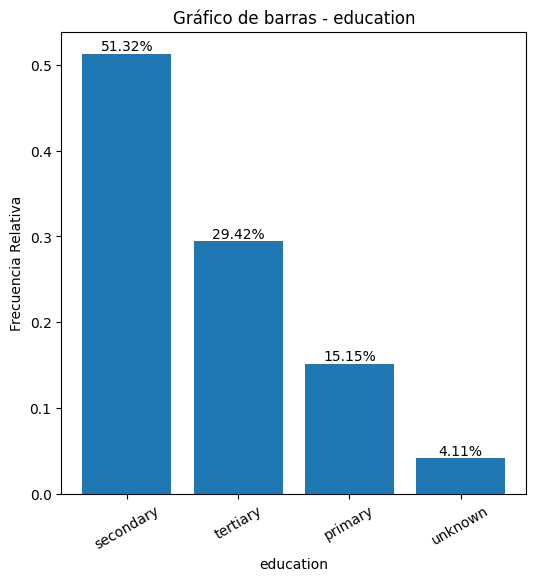

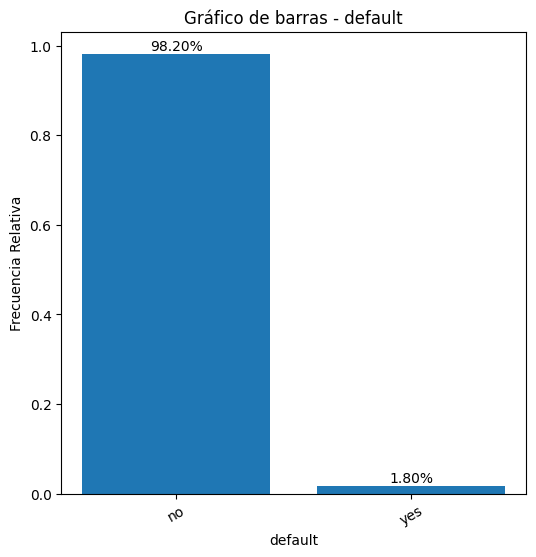

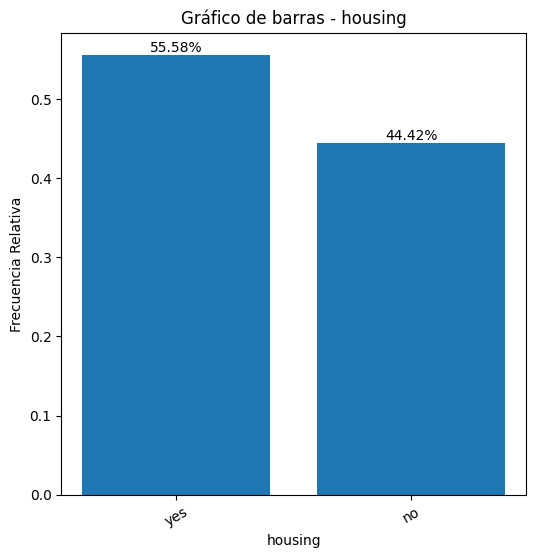

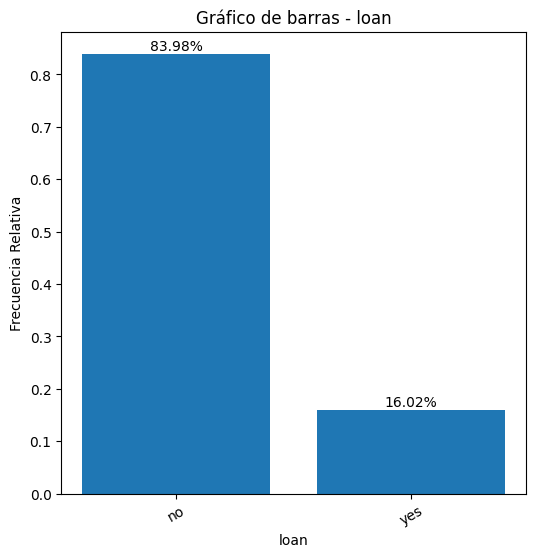

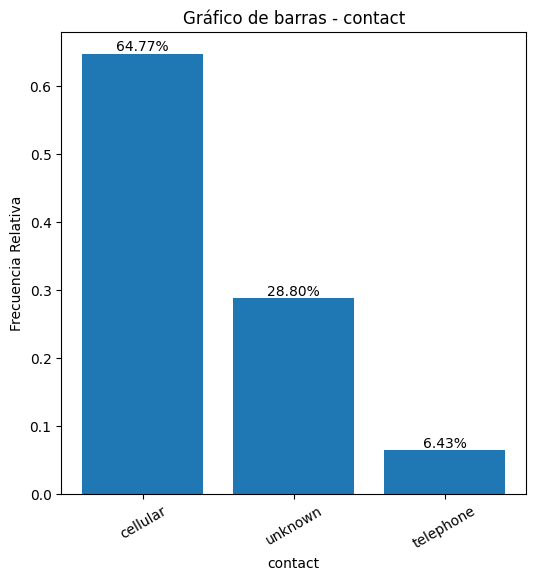

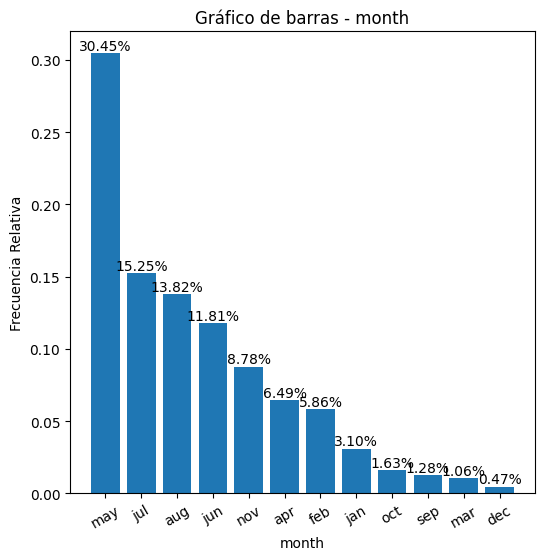

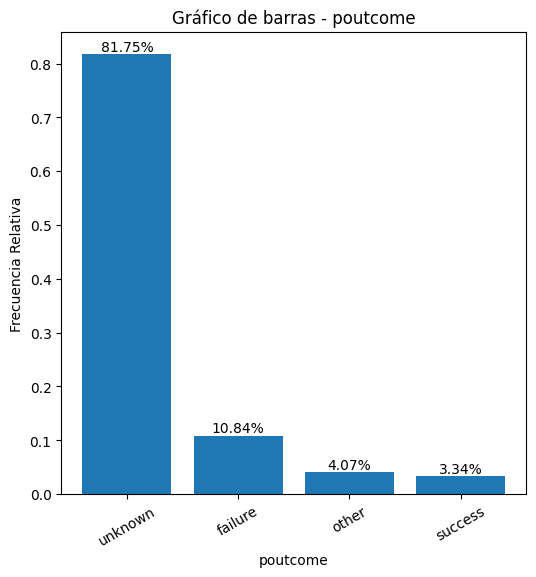

In [11]:
# Histograma de freciencias de las variables categóricas
for column in categorical_columns:
    category_counts = data[column].value_counts(normalize=True)
    # Calcular las frecuencias relativas
    plt.figure(figsize=(6, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    plt.title(f"Gráfico de barras - {column}")
    plt.xticks(rotation=30)

    # Mostrar las frecuencias relativas en las etiquetas de las barras
    for i, v in enumerate(category_counts.values):
        plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.show()

**Análisis de la relación entre variables categóricas y una variable objetivo**

 Tabla de contingencia.

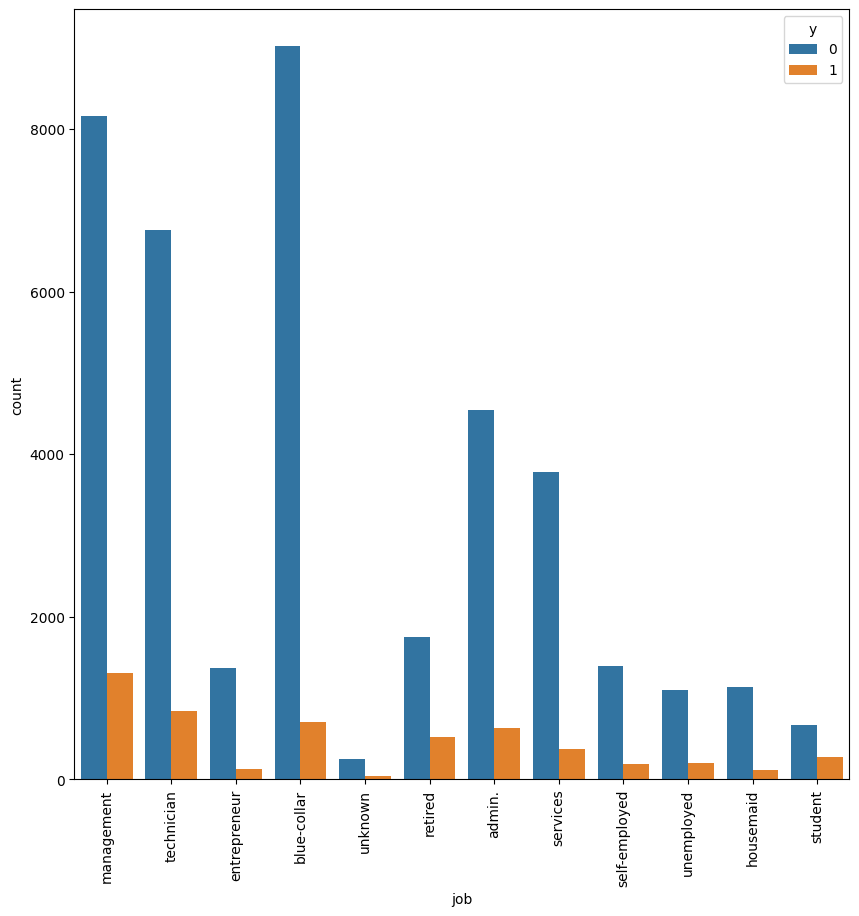

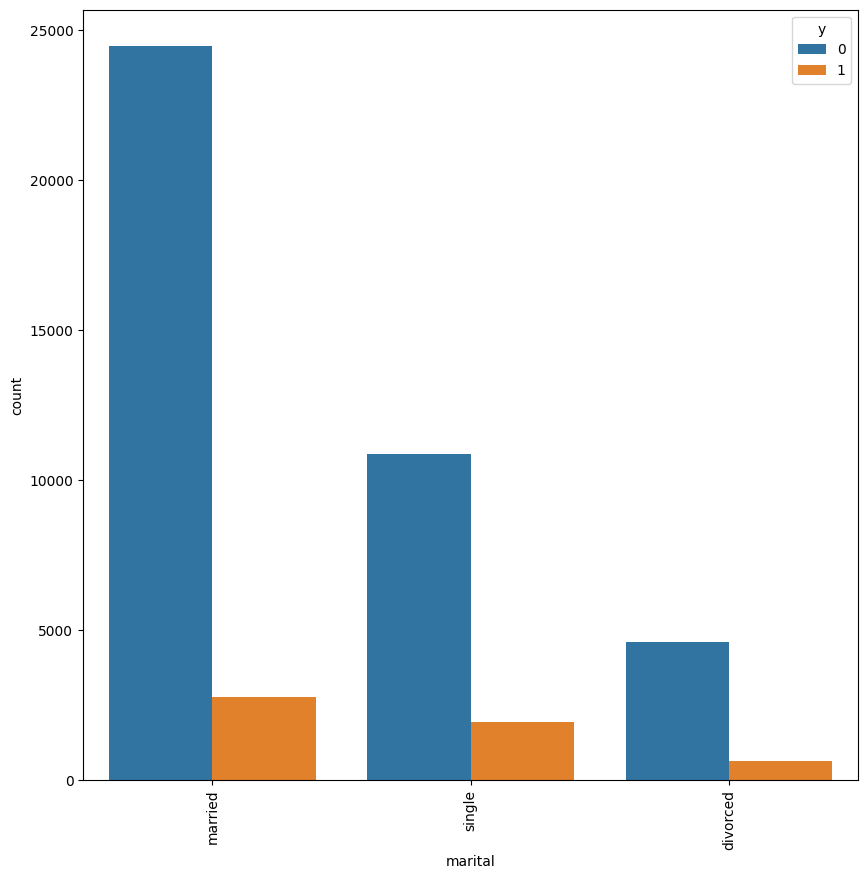

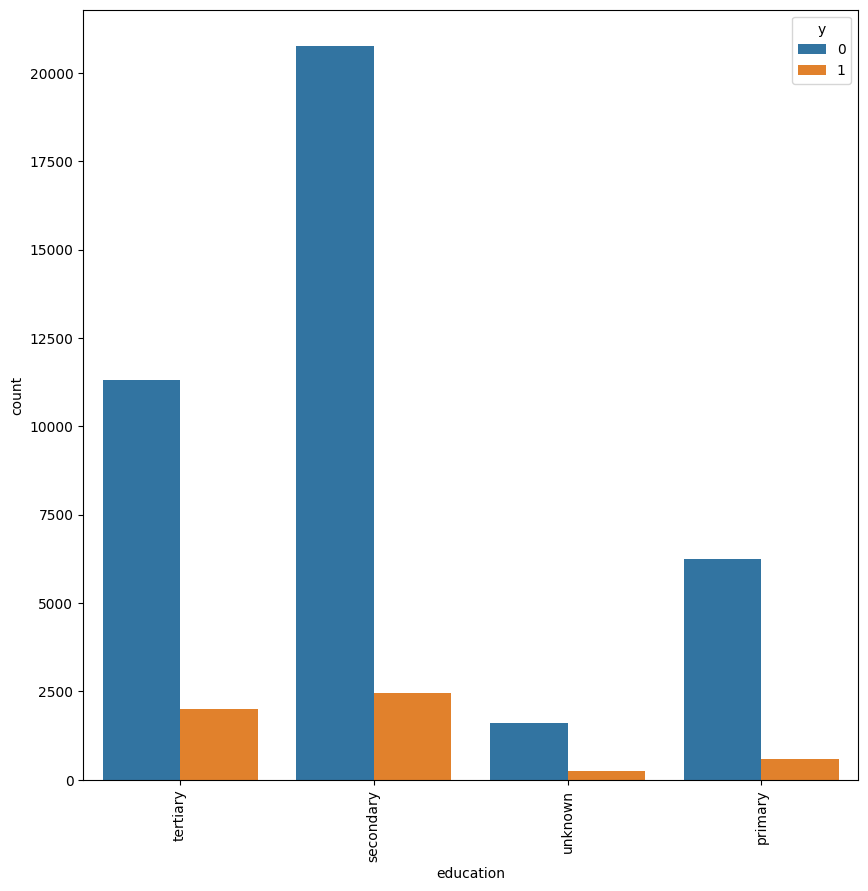

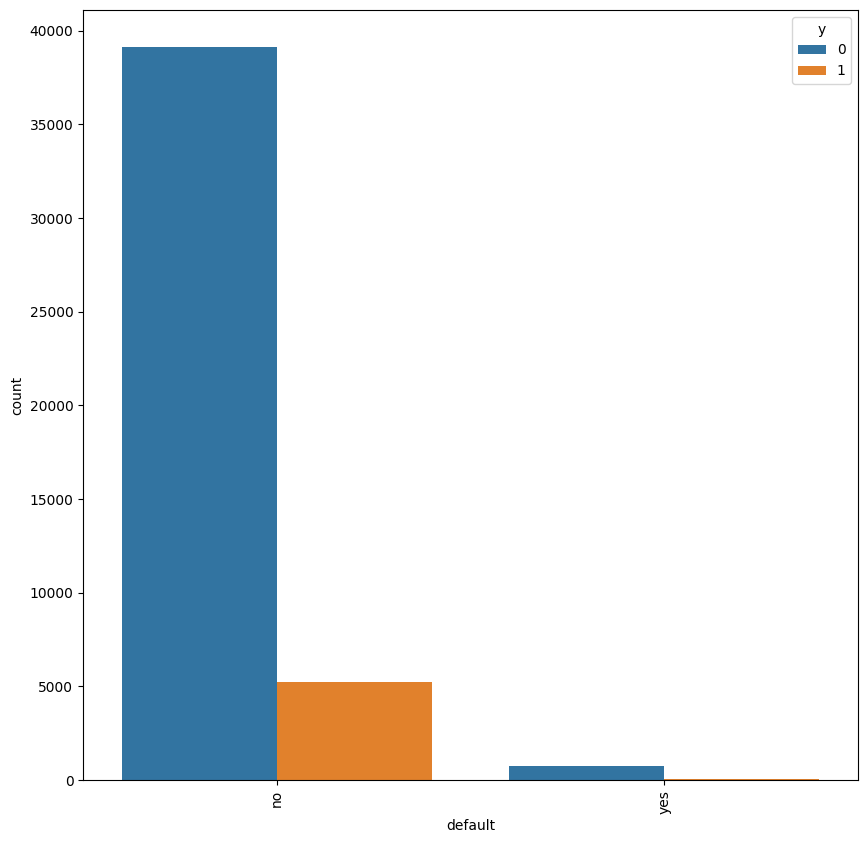

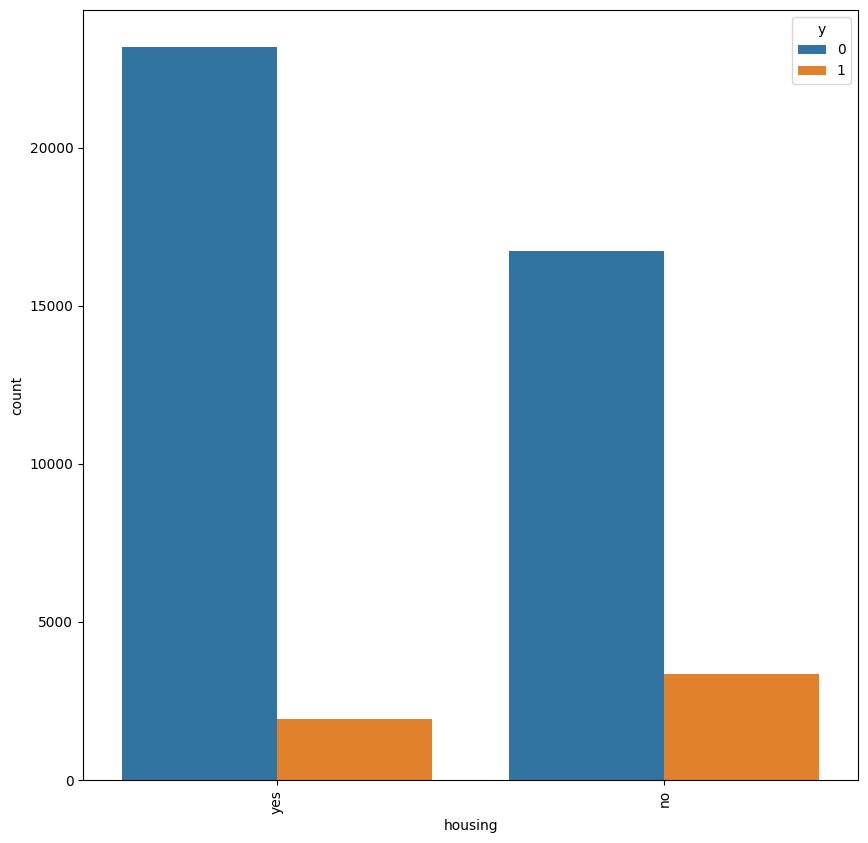

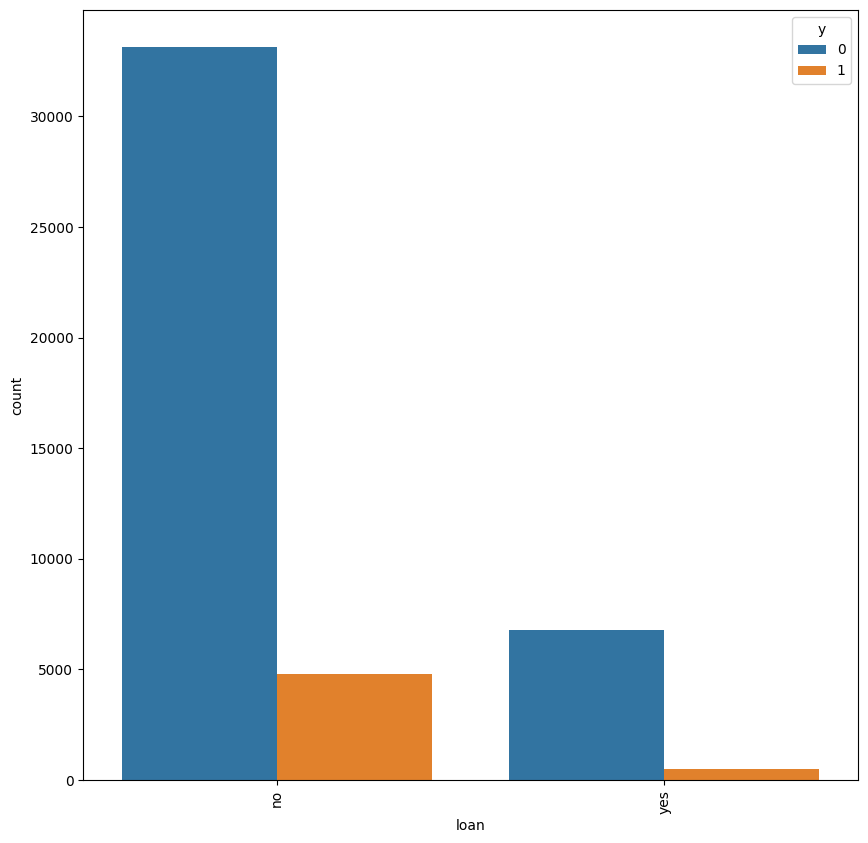

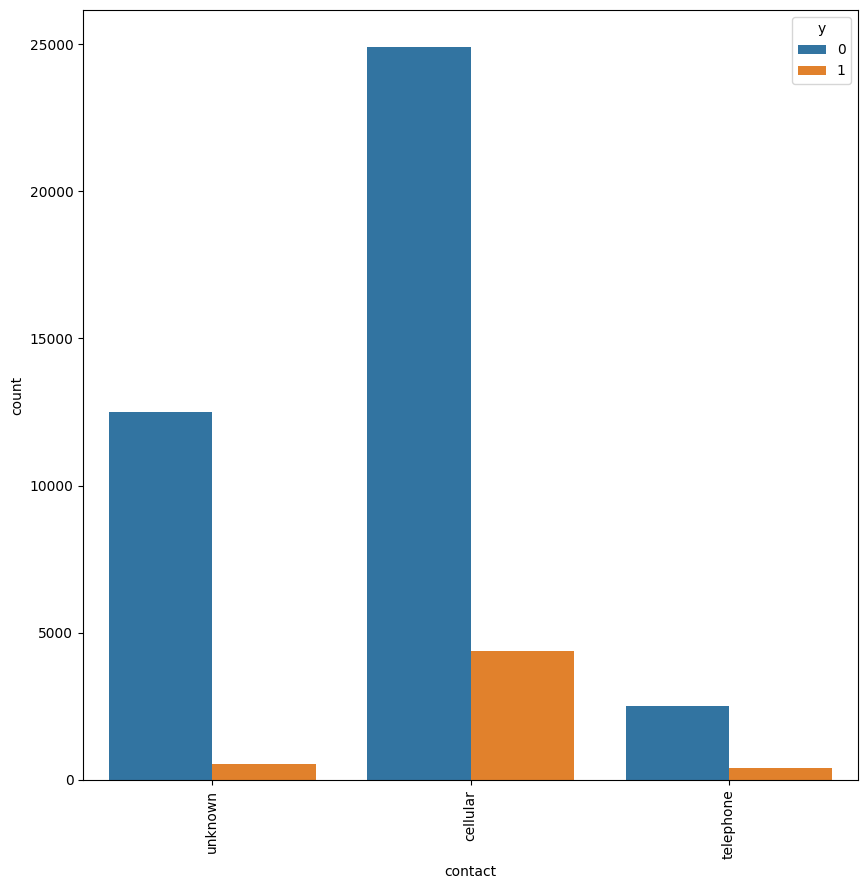

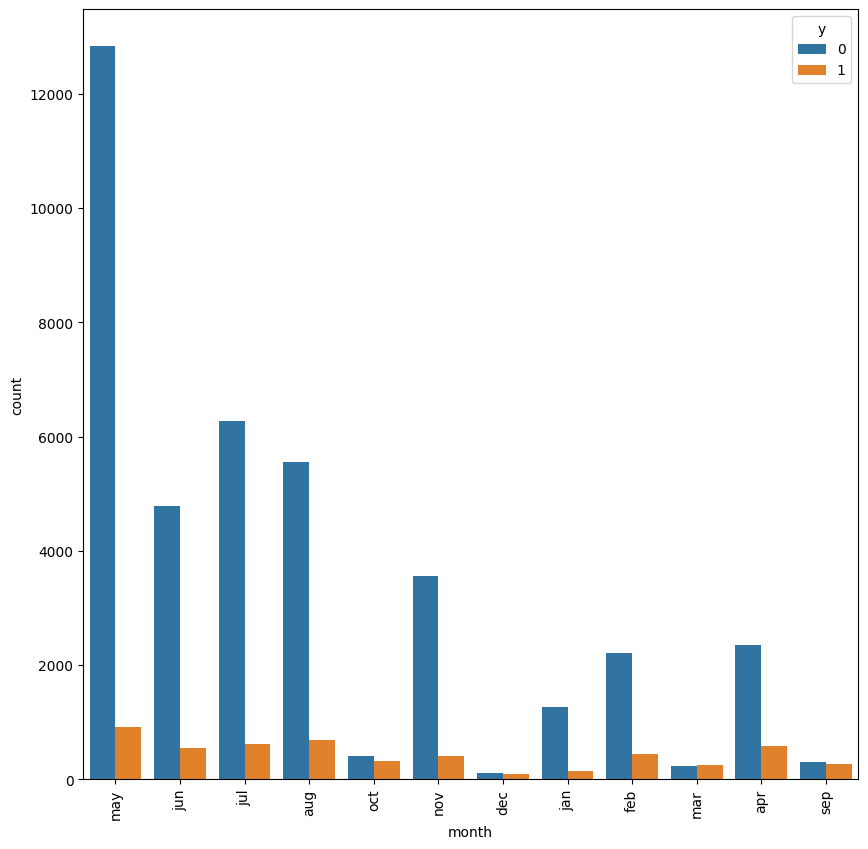

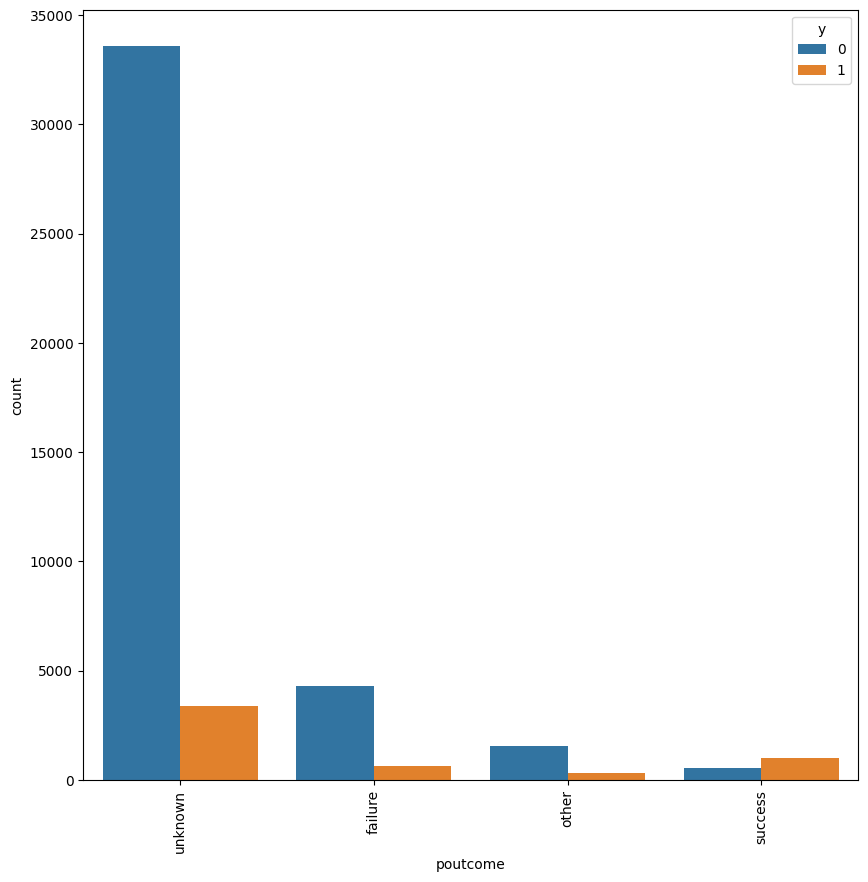

In [12]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data, x=column,hue='y')
    plt.xticks(rotation='vertical')
    plt.show()

column_cat = data.select_dtypes(include='object').columns

for _ in column_cat:
    plot_categorial(_)

In [13]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
for column in categorical_columns:
  print("\n")
  print(data.groupby(column).agg(count=('y', 'count'), hi=('y', 'mean')).sort_values(by="hi", ascending=False))




               count        hi
job                           
student          938  0.286780
retired         2264  0.227915
unemployed      1303  0.155027
management      9458  0.137556
admin.          5171  0.122027
self-employed   1579  0.118429
unknown          288  0.118056
technician      7597  0.110570
services        4154  0.088830
housemaid       1240  0.087903
entrepreneur    1487  0.082717
blue-collar     9732  0.072750


          count        hi
marital                  
single    12790  0.149492
divorced   5207  0.119455
married   27214  0.101235


           count        hi
education                 
tertiary   13301  0.150064
unknown     1857  0.135703
secondary  23202  0.105594
primary     6851  0.086265


         count        hi
default                 
no       44396  0.117961
yes        815  0.063804


         count        hi
housing                 
no       20081  0.167024
yes      25130  0.077000


      count        hi
loan                 
no    37967  0.126

**Se observó:**
Analizando la relación de las variables categóricas con la variable objetivo (y), tenemos:

1. En **Job:** La categoría "*student*" tiene la mayor probabilidad (28.7%) de suscribir un depósito a plazo fijo.
2. En **marital:** La categoría "*single*" tiene la mayor probabilidad (14.9%) de suscribir un depósito a plazo fijo.     
3. En **education:** La categoría "*tertiary*" tiene la mayor probabilidad (15%) de suscribir un depósito a plazo fijo.           


# 1.2 Análisis de la variable numérica

In [14]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [15]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
print("Lista de Variables Numéricas:",variables_numericas,"\n")
#  Seleccionamos un subconjunto del dataset que solo incluye a las variables numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float'])
numeric_columns.describe().transpose()

Lista de Variables Numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y'] 



,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [16]:
data.groupby(['y','pdays']).size()
# Eliminar pdays muchos negativos

y  pdays
0  -1       33570
    1           9
    2          35
    3           1
    4           1
            ...  
1   804         1
    805         1
    828         1
    842         1
    854         1
Length: 914, dtype: int64

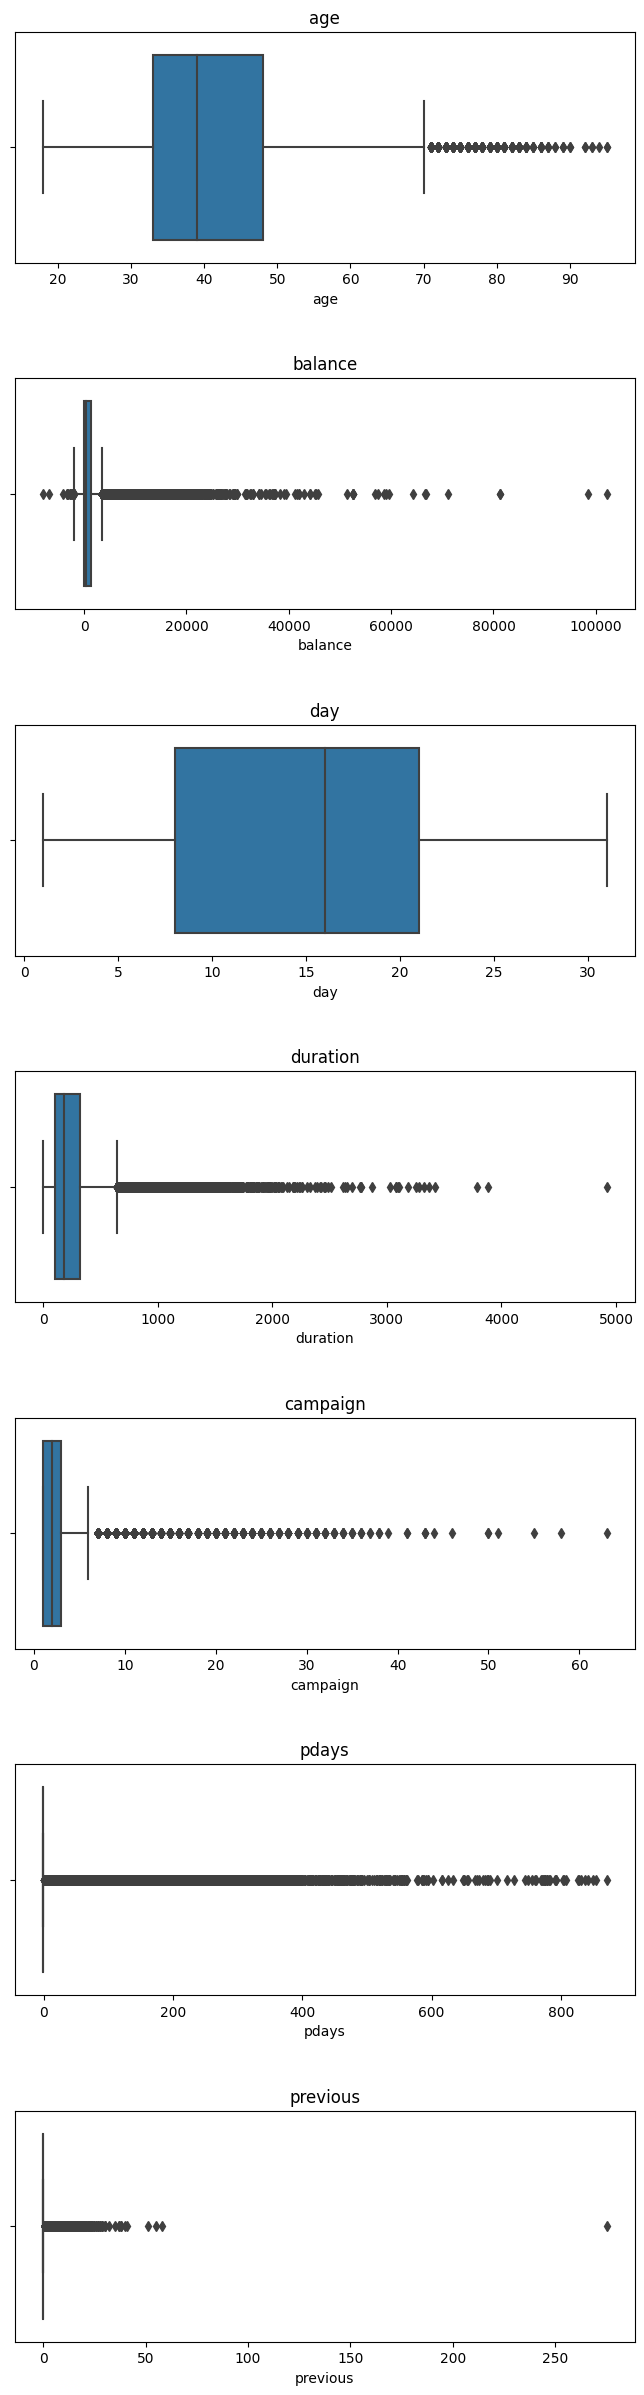

In [17]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
#cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous']
cols_num =variables_numericas[:-1]
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# 2. Selección de muestras

In [18]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=123)

In [19]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 45211
Tamaño de train: 31647
Tamaño de test: 13564


# 3. Pre selección de variables

In [20]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)

pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)

pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0,0.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0,0.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0,0.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0,0.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0,0.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0,0.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0,0.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [22]:
variables_categoricas = train.select_dtypes(include=['object']).columns.tolist()
cols_cat=variables_categoricas+['y']
print("Lista de Variables Categóricas: ",variables_categoricas,"\n")
print("Lista de Variables Categóricas: ",cols_cat,"\n")

Lista de Variables Categóricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

Lista de Variables Categóricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 



In [23]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45211, 17)
Tamaño del set después de eliminar las filas repetidas: (45211, 17)


# 4. Tratamiento de variables

4.1 Tratamiento de Variables Numéricas

In [24]:
# Tratamiento de outliers por RIC

# Calculando los intervalos RIC

pdResume['ric'] = pdResume['Q3'] - pdResume['Q1']

pdResume['min_ric'] = pdResume['Q1'] - 1.5*pdResume['ric']
pdResume['max_ric'] = pdResume['Q3'] + 1.5*pdResume['ric']

pdResume.head(10)

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,ric,min_ric,max_ric
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0,0.0,15.0,10.50,70.50
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0,0.0,1376.5,-1991.75,3514.25
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0,0.0,13.0,-11.50,40.50
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0,0.0,214.0,-218.00,638.00
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0,0.0,2.0,-2.00,6.00
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0,0.0,0.0,-1.00,-1.00
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.00,0.00
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00


In [25]:
# Tratamiento de outliers por RIC

for col in pdResume.feature.tolist():
  desc = pdResume.loc[pdResume.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]
  if col!='y':
    train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
    test[col + '_tric'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)



train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 44828 to 36463
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            31647 non-null  int64  
 1   job            31647 non-null  object 
 2   marital        31647 non-null  object 
 3   education      31647 non-null  object 
 4   default        31647 non-null  object 
 5   balance        31647 non-null  int64  
 6   housing        31647 non-null  object 
 7   loan           31647 non-null  object 
 8   contact        31647 non-null  object 
 9   day            31647 non-null  int64  
 10  month          31647 non-null  object 
 11  duration       31647 non-null  int64  
 12  campaign       31647 non-null  int64  
 13  pdays          31647 non-null  int64  
 14  previous       31647 non-null  int64  
 15  poutcome       31647 non-null  object 
 16  y              31647 non-null  int64  
 17  age_tric       31647 non-null  float64
 18  ba

In [109]:
print(variables_numericas[:-1])

variables_numericas_ric = [x + '_tric' for x in variables_numericas[:-1] ]
variables_numericas_ric

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


['age_tric',
 'balance_tric',
 'day_tric',
 'duration_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric']

4.2 Tratamiento de Variables Categóricas

In [27]:
if 'job' in train.columns.tolist():
  print(train['job'].value_counts())

blue-collar      6836
management       6593
technician       5333
admin.           3604
services         2893
retired          1585
self-employed    1112
entrepreneur     1024
unemployed        904
housemaid         902
student           664
unknown           197
Name: job, dtype: int64


In [28]:
if 'job' in train.columns.tolist():
  train['job'].drop_duplicates()

In [29]:
# Mapear las categorías a los nuevos valores
mapping = {
    'management': 'Estable',
    'services': 'Inestable',
    'blue-collar': 'Inestable',
    'technician': 'Moderado',
    'entrepreneur': 'Moderado',
    'student': 'Variable',
    'retired': 'Estable',
    'admin.': 'Estable',
    'housemaid': 'Inestable',
    'self-employed': 'Moderado',
    'unemployed': 'Inestable',
    'unknown': 'Variable'
}
if 'job' in train.columns.tolist():
  # EN TRAIN: Crear la nueva columna "financial-stability" utilizando el mapeo de categorías
    train['financial-stability'] = train['job'].map(mapping)

        # Eliminar la columna "JOB" si ya no es necesaria
    train.drop('job', axis=1, inplace=True)
# EN TEST: Crear la nueva columna "financial-stability" utilizando el mapeo de categorías
    test['financial-stability'] = test['job'].map(mapping)

# Eliminar la columna "JOB" si ya no es necesaria
    test.drop('job', axis=1, inplace=True)




In [30]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 44828 to 36463
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31647 non-null  int64  
 1   marital              31647 non-null  object 
 2   education            31647 non-null  object 
 3   default              31647 non-null  object 
 4   balance              31647 non-null  int64  
 5   housing              31647 non-null  object 
 6   loan                 31647 non-null  object 
 7   contact              31647 non-null  object 
 8   day                  31647 non-null  int64  
 9   month                31647 non-null  object 
 10  duration             31647 non-null  int64  
 11  campaign             31647 non-null  int64  
 12  pdays                31647 non-null  int64  
 13  previous             31647 non-null  int64  
 14  poutcome             31647 non-null  object 
 15  y                    31647 non-n

In [31]:

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 5997 to 44440
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13564 non-null  int64  
 1   marital              13564 non-null  object 
 2   education            13564 non-null  object 
 3   default              13564 non-null  object 
 4   balance              13564 non-null  int64  
 5   housing              13564 non-null  object 
 6   loan                 13564 non-null  object 
 7   contact              13564 non-null  object 
 8   day                  13564 non-null  int64  
 9   month                13564 non-null  object 
 10  duration             13564 non-null  int64  
 11  campaign             13564 non-null  int64  
 12  pdays                13564 non-null  int64  
 13  previous             13564 non-null  int64  
 14  poutcome             13564 non-null  object 
 15  y                    13564 non-nu

In [32]:
if 'job' not in train.columns.tolist():
  print(train['financial-stability'].drop_duplicates())


44828      Estable
11344    Inestable
39971     Moderado
13497     Variable
Name: financial-stability, dtype: object


In [33]:
variables_categoricas = train.select_dtypes(include=['object']).columns.tolist()

print("Lista de Variables Categóricas: ",variables_categoricas,"\n")

Lista de Variables Categóricas:  ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'financial-stability'] 



In [34]:

!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00


In [35]:

# Tratamiento con Target Encoder
# Se trabajará una consolidación con la variable "job"
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[variables_categoricas].astype('category'), train['y'])

TargetEncoder(cols=['marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome', 'financial-stability'],
              handle_unknown='infrequent_if_exist')

In [36]:

TargetEncoder(cols=['financial-stability',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome'],
              handle_unknown='infrequent_if_exist')

TargetEncoder(cols=['financial-stability', 'marital', 'education', 'default',
                    'housing', 'loan', 'contact', 'month', 'poutcome'],
              handle_unknown='infrequent_if_exist')

In [37]:

train[[x + '_coded' for x in variables_categoricas]] = encoder.transform(train[variables_categoricas].astype('category'))
test[[x + '_coded' for x in variables_categoricas]] = encoder.transform(test[variables_categoricas].astype('category'))

In [38]:

train[['financial-stability', 'financial-stability_coded']].head(10)

,financial-stability,financial-stability_coded
44828,Estable,0.143439
11344,Inestable,0.086866
28435,Inestable,0.086866
39971,Moderado,0.107377
5747,Estable,0.143439
115,Inestable,0.086866
21846,Estable,0.143439
41475,Estable,0.143439
42498,Inestable,0.086866
39152,Moderado,0.107377


In [39]:
train.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,financial-stability,marital_coded,education_coded,default_coded,housing_coded,loan_coded,contact_coded,month_coded,poutcome_coded,financial-stability_coded
44828,34,married,tertiary,no,3301,yes,no,cellular,17,sep,...,Estable,0.100525,0.147732,0.117944,0.078196,0.126335,0.149123,0.467626,0.643059,0.143439
11344,47,married,primary,no,504,no,yes,unknown,18,jun,...,Inestable,0.100525,0.090324,0.117944,0.165869,0.067800,0.040985,0.102267,0.092126,0.086866
28435,26,single,primary,no,155,yes,no,cellular,29,jan,...,Inestable,0.149340,0.090324,0.117944,0.078196,0.126335,0.149123,0.100798,0.124602,0.086866
39971,23,single,secondary,no,4545,no,no,cellular,3,jun,...,Moderado,0.149340,0.105250,0.117944,0.165869,0.126335,0.149123,0.102267,0.092126,0.107377
5747,47,single,tertiary,no,191,yes,no,unknown,26,may,...,Estable,0.149340,0.147732,0.117944,0.078196,0.126335,0.040985,0.066756,0.092126,0.143439


## Análisis Univariado

In [40]:
categorical_features_coded = [x + '_coded' for x in variables_categoricas]
categorical_features_coded

['marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

In [125]:
variables_numericas_ric

['balance_tric',
 'day_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'age_tric4',
 'duration_tric2']

In [126]:
univariate = train[variables_numericas_ric + categorical_features_coded].describe().transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '25%': 'Q1',
                             '50%' : 'median',
                            '75%': 'Q3'}, inplace = True)
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,balance_tric,31647.0,9.446246e+02,1.193636e+03,-1991.750000,7.300000e+01,4.480000e+02,1.449500e+03,3.514250e+03,0.0
1,day_tric,31647.0,1.583423e+01,8.335395e+00,1.000000,8.000000e+00,1.600000e+01,2.100000e+01,3.100000e+01,0.0
2,campaign_tric,31647.0,2.400733e+00,1.606447e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,0.0
3,pdays_tric,31647.0,-1.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.0
4,previous_tric,31647.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
5,age_tric4,31647.0,4.020937e+06,4.293322e+06,104976.000000,1.185921e+06,2.313441e+06,5.308416e+06,2.470339e+07,0.0
6,duration_tric2,31647.0,8.599054e+04,1.191250e+05,0.000000,1.060900e+04,3.204100e+04,1.004890e+05,4.070440e+05,0.0
7,marital_coded,31647.0,1.169779e-01,2.153200e-02,0.100525,1.005255e-01,1.005255e-01,1.493405e-01,1.493405e-01,0.0
8,education_coded,31647.0,1.169779e-01,2.200299e-02,0.090324,1.052502e-01,1.052502e-01,1.477322e-01,1.477322e-01,0.0
9,default_coded,31647.0,1.169779e-01,7.225169e-03,0.062950,1.179441e-01,1.179441e-01,1.179441e-01,1.179441e-01,0.0


In [43]:

# Tratamiento de outliers por percentiles

# for col in univariate.feature.tolist():
#   if col not in ['age']:
#     print(col)
#     desc = univariate.loc[univariate.feature == col]

#     lower_limit = desc.p5.values[0]
#     upper_limit = desc.p95.values[0]
#     train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
#                                                     upper_limit if x >= upper_limit else
#                                                     x)

#     test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
#                                                upper_limit if x >= upper_limit else
#                                                x)


In [44]:
print(len(univariate.feature.tolist()))
univariate.feature.tolist()

17


['age_tric',
 'balance_tric',
 'day_tric',
 'duration_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded',
 'y']

In [45]:
print(len(train.columns.to_list()))
train.columns.to_list()

33


['age',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'age_tric',
 'balance_tric',
 'day_tric',
 'duration_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'financial-stability',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

<Axes: xlabel='age'>

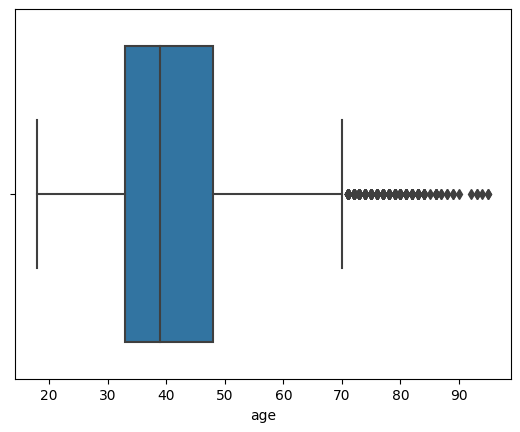

In [46]:

sns.boxplot(x = train.age)

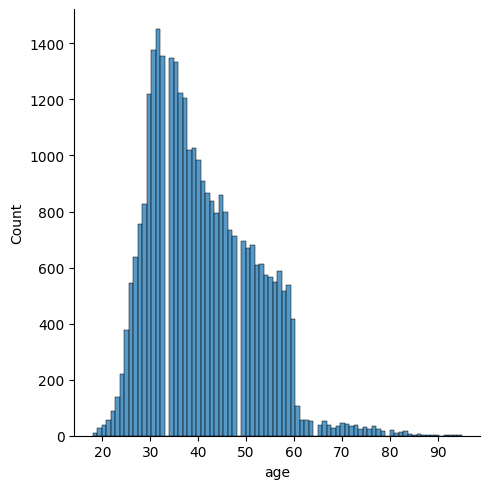

In [47]:
sns.displot(x = train.age)

<Axes: xlabel='age_tric'>

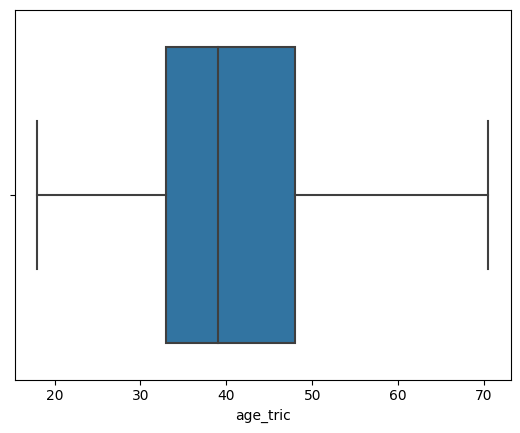

In [48]:
sns.boxplot(x = train.age_tric)

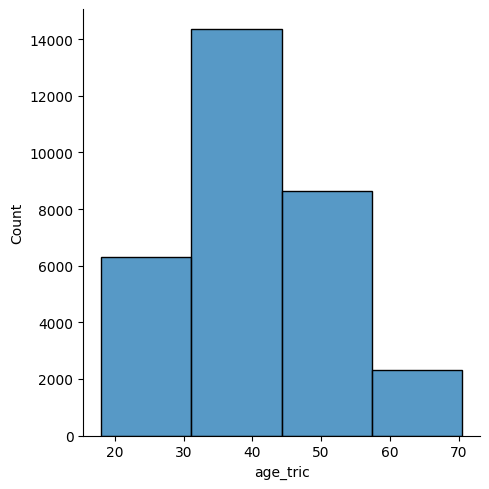

In [49]:
sns.displot(x = train.age_tric, bins=4)

### Análisis Bivariado

<ipython-input-85-aa3cc1da2b94>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='age_tric_rango', ylabel='y'>

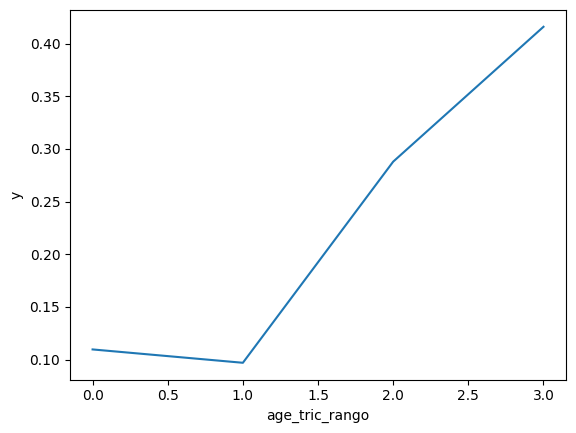

In [85]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'age_tric'
temp = train.copy()
temp[var]=temp[var]**4
# POLINOMIAL DE GRADO 4: age_tric4
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-67-505f90374c7c>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='balance_tric_rango', ylabel='y'>

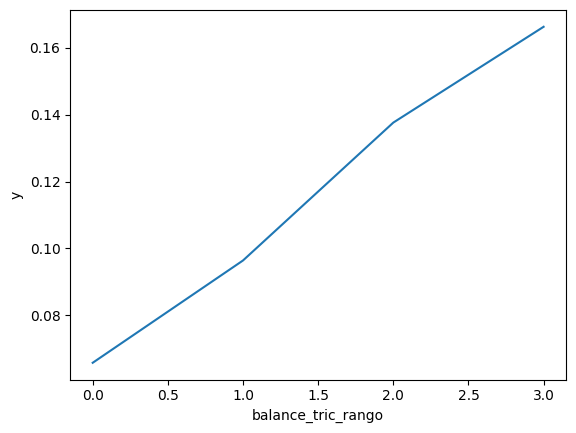

In [67]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'balance_tric'
temp = train.copy()
temp[var]=temp[var]
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-97-b7a25b407e4f>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='day_tric_rango', ylabel='y'>

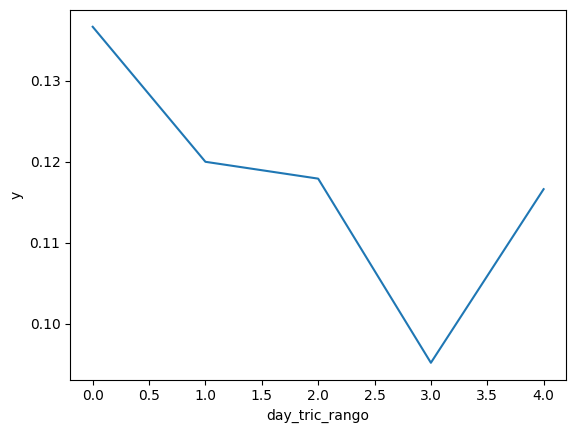

In [97]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'day_tric'
temp = train.copy()
temp[var]=temp[var]**1
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =5,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-68-33e8d38da4c5>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='duration_tric_rango', ylabel='y'>

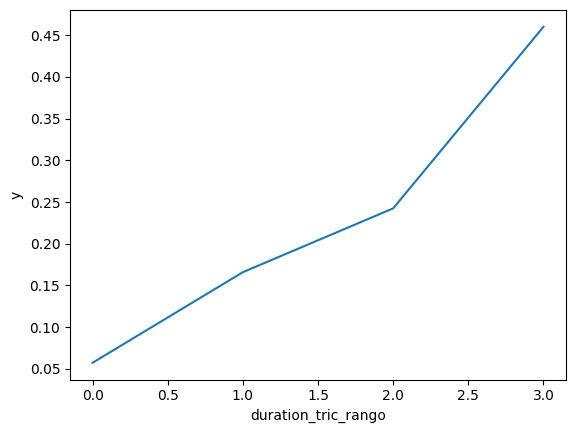

In [68]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'duration_tric'
temp = train.copy()
temp[var]=temp[var]**2
# polinomial de grado 2: duration_tric2
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-76-99165da6ea51>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='campaign_tric_rango', ylabel='y'>

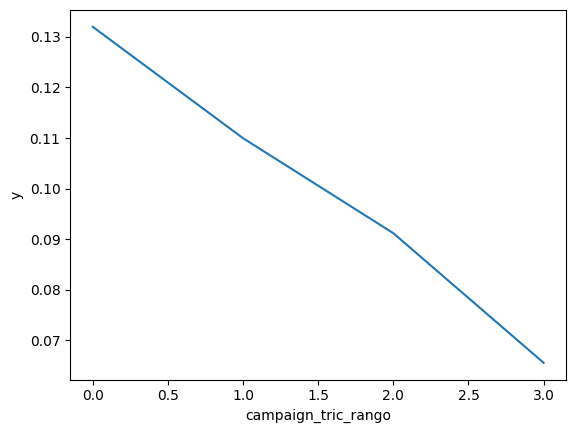

In [76]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'campaign_tric'
temp = train.copy()
temp[var]=temp[var]
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

In [163]:
train["pdays_tric"].g

44828   -1.0
11344   -1.0
28435   -1.0
39971   -1.0
5747    -1.0
        ... 
11045   -1.0
44614   -1.0
7162    -1.0
43243   -1.0
36463   -1.0
Name: pdays_tric, Length: 31647, dtype: float64

<ipython-input-162-a03c89747ecc>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(


<Axes: xlabel='pdays_tric_rango', ylabel='y'>

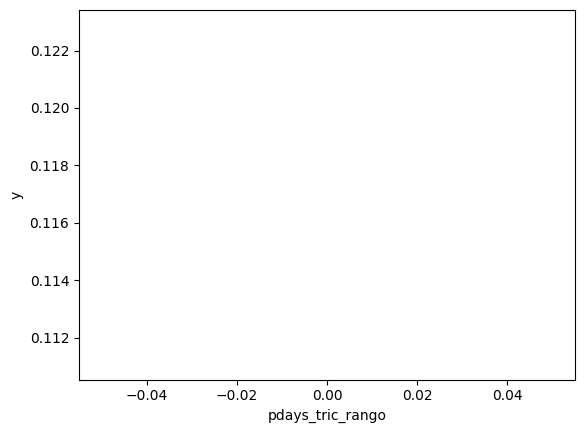

In [162]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'pdays_tric'
temp = train.copy()
temp[var]=temp[var]
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

**Observación:**

Analizando la relación entre las variables numericas y la variable categorica objetivo, se tiene:

Relaciones inversas con 'y':  campaign_tric, day_tric ( en terminos generales)

Relaciones directas con 'y' : duration_tric2, balance_tric, age_tric4 ( en general)

No relacionadas: pdays_tric,previous_tric

In [107]:
variables_numericas_ric

['balance_tric', 'day_tric', 'campaign_tric', 'pdays_tric', 'previous_tric']

In [99]:
# TRANSFORMACIÓN POLINOMIAL EN TRAIN DE ALGUNAS VARAIBLES NUMERICAS
train["age_tric4"]=train["age_tric"]**4
train["duration_tric2"]=train["duration_tric"]**2


# TRANSFORMACIÓN POLINOMIAL EN TEST DE ALGUNAS VARAIBLES NUMERICAS
test["age_tric4"]=test["age_tric"]**4
test["duration_tric2"]=test["duration_tric"]**2

In [114]:
# ACTUALIZANDO LAS VARIABLEs NUMERICAs

variables_numericas_ric.remove("age_tric")
variables_numericas_ric.remove('duration_tric')
variables_numericas_ric.append("age_tric4")
variables_numericas_ric.append("duration_tric2")
variables_numericas_ric

['balance_tric',
 'day_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'age_tric4',
 'duration_tric2']

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 5997 to 44440
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13564 non-null  int64  
 1   marital                    13564 non-null  object 
 2   education                  13564 non-null  object 
 3   default                    13564 non-null  object 
 4   balance                    13564 non-null  int64  
 5   housing                    13564 non-null  object 
 6   loan                       13564 non-null  object 
 7   contact                    13564 non-null  object 
 8   day                        13564 non-null  int64  
 9   month                      13564 non-null  object 
 10  duration                   13564 non-null  int64  
 11  campaign                   13564 non-null  int64  
 12  pdays                      13564 non-null  int64  
 13  previous                   13564 non-null  

In [117]:
# analisis de la realcion entre variables categoricas y target. Seleccion:

from scipy.stats import chi2_contingency

# Prueba de chi-cuadrado para evaluar la asociación
for variable in categorical_features_coded:
    crosstab = pd.crosstab(train[variable], train["y"])
    chi2, p_value, _, _ = chi2_contingency(crosstab)
    print(f"Variable: {variable}")
    print(f"Estadístico de chi-cuadrado: {chi2}")
    print(f"Valor p: {round(p_value,5)}\n")

Variable: marital_coded
Estadístico de chi-cuadrado: 142.0404800237912
Valor p: 0.0

Variable: education_coded
Estadístico de chi-cuadrado: 148.3224783190415
Valor p: 0.0

Variable: default_coded
Estadístico de chi-cuadrado: 15.465371675903569
Valor p: 8e-05

Variable: housing_coded
Estadístico de chi-cuadrado: 580.0735836552753
Valor p: 0.0

Variable: loan_coded
Estadístico de chi-cuadrado: 140.42021300597628
Valor p: 0.0

Variable: contact_coded
Estadístico de chi-cuadrado: 715.0690491585075
Valor p: 0.0

Variable: month_coded
Estadístico de chi-cuadrado: 2151.986459435698
Valor p: 0.0

Variable: poutcome_coded
Estadístico de chi-cuadrado: 3019.8769338847687
Valor p: 0.0

Variable: financial-stability_coded
Estadístico de chi-cuadrado: 317.19865368807024
Valor p: 0.0



**Anáisis bivariado entre variable categoricas y el target**

Con un nivel de significancia del 5% se concluye que:
Existe una realción o asociatividad entre las variables categoricas y la variable objetivo. Es decir, esta reliación no es por el azar.



In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 44828 to 36463
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        31647 non-null  int64  
 1   marital                    31647 non-null  object 
 2   education                  31647 non-null  object 
 3   default                    31647 non-null  object 
 4   balance                    31647 non-null  int64  
 5   housing                    31647 non-null  object 
 6   loan                       31647 non-null  object 
 7   contact                    31647 non-null  object 
 8   day                        31647 non-null  int64  
 9   month                      31647 non-null  object 
 10  duration                   31647 non-null  int64  
 11  campaign                   31647 non-null  int64  
 12  pdays                      31647 non-null  int64  
 13  previous                   31647 non-null 

## Tratamiento de Missing

In [119]:
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-119-b1ef414424de>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-119-b1ef414424de>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


## Pre-Selección de Variables

In [127]:
## Pre-Selección de Variables usando el GINI

from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': variables_numericas_ric + categorical_features_coded,
                       'gini': [roc_auc_score(train.y, train[col])*2-1 for col in variables_numericas_ric + categorical_features_coded]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
6,duration_tric2,0.616671,0.616671
13,month_coded,0.314496,0.314496
14,poutcome_coded,0.222789,0.222789
12,contact_coded,0.218052,0.218052
10,housing_coded,0.209372,0.209372
0,balance_tric,0.178607,0.178607
15,financial-stability_coded,0.154896,0.154896
2,campaign_tric,-0.143586,0.143586
8,education_coded,0.109445,0.109445
7,marital_coded,0.104012,0.104012


Variables ***sin relacion*** con la variable objetivo Y:  pdays_tric, previous_tric

Variables ***con relacion inversa o negativa*** con la variable objetivo Y:

campaign_tric, day_tric,age_tric4

Variables ***con relacion directa o positiva:***    el resto de variables


In [128]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,gini,gini_abs
6,duration_tric2,31647.0,8.599054e+04,1.191250e+05,0.000000,1.060900e+04,3.204100e+04,1.004890e+05,4.070440e+05,0.0,0.616671,0.616671
13,month_coded,31647.0,1.169779e-01,8.381039e-02,0.066756,6.675623e-02,9.911190e-02,1.106001e-01,4.954683e-01,0.0,0.314496,0.314496
14,poutcome_coded,31647.0,1.169779e-01,9.928255e-02,0.092126,9.212614e-02,9.212614e-02,9.212614e-02,6.430595e-01,0.0,0.222789,0.222789
12,contact_coded,31647.0,1.169779e-01,4.831170e-02,0.040985,4.098542e-02,1.491228e-01,1.491228e-01,1.491228e-01,0.0,0.218052,0.218052
10,housing_coded,31647.0,1.169779e-01,4.354489e-02,0.078196,7.819583e-02,7.819583e-02,1.658690e-01,1.658690e-01,0.0,0.209372,0.209372
0,balance_tric,31647.0,9.446246e+02,1.193636e+03,-1991.750000,7.300000e+01,4.480000e+02,1.449500e+03,3.514250e+03,0.0,0.178607,0.178607
15,financial-stability_coded,31647.0,1.169779e-01,3.217688e-02,0.086866,8.686606e-02,1.073772e-01,1.434391e-01,2.415796e-01,0.0,0.154896,0.154896
2,campaign_tric,31647.0,2.400733e+00,1.606447e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,0.0,-0.143586,0.143586
8,education_coded,31647.0,1.169779e-01,2.200299e-02,0.090324,1.052502e-01,1.052502e-01,1.477322e-01,1.477322e-01,0.0,0.109445,0.109445
7,marital_coded,31647.0,1.169779e-01,2.153200e-02,0.100525,1.005255e-01,1.005255e-01,1.493405e-01,1.493405e-01,0.0,0.104012,0.104012


In [175]:

print(len(univariate_II.feature.tolist()))
univariate_II.feature.tolist()

16


['balance_tric',
 'day_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'age_tric4',
 'duration_tric2',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

In [183]:
#Seleccion de Variables
# Eliminamos las que tienen un GINI <5% , es decir tienen poca asociatividad con el target
# Como el dataset no tiene missing , no es distriminatorio

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 16
selected features: 11


**Observación:**

Se eliminó 5 variables de enttrada que no tenian una marcada asociación con el target, lo cual se observó en sus GINI< 5%

Las variables eliminadas fueron: previous_tric,pdays_tric,age_tric4, default_coded, day_tric

In [184]:
print("Cantidad de Variables explicativas totales: ",len(final_features))
final_features

Cantidad de Variables explicativas totales:  11


['balance_tric',
 'campaign_tric',
 'duration_tric2',
 'marital_coded',
 'education_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

In [185]:
train[final_features]

,balance_tric,campaign_tric,duration_tric2,marital_coded,education_coded,housing_coded,loan_coded,contact_coded,month_coded,poutcome_coded,financial-stability_coded
44828,3301.00,5.0,26896.0,0.100525,0.147732,0.078196,0.126335,0.149123,0.467626,0.643059,0.143439
11344,504.00,3.0,24336.0,0.100525,0.090324,0.165869,0.067800,0.040985,0.102267,0.092126,0.086866
28435,155.00,1.0,84681.0,0.149340,0.090324,0.078196,0.126335,0.149123,0.100798,0.124602,0.086866
39971,3514.25,1.0,40000.0,0.149340,0.105250,0.165869,0.126335,0.149123,0.102267,0.092126,0.107377
5747,191.00,1.0,44944.0,0.149340,0.147732,0.078196,0.126335,0.040985,0.066756,0.092126,0.143439
...,...,...,...,...,...,...,...,...,...,...,...
11045,236.00,4.0,28561.0,0.100525,0.105250,0.165869,0.126335,0.040985,0.102267,0.092126,0.107377
44614,3514.25,3.0,401956.0,0.100525,0.147732,0.165869,0.126335,0.149123,0.110600,0.162539,0.107377
7162,1910.00,2.0,170569.0,0.100525,0.090324,0.078196,0.126335,0.040985,0.066756,0.092126,0.143439
43243,588.00,1.0,167281.0,0.123400,0.105250,0.165869,0.126335,0.149123,0.495468,0.092126,0.086866


### Estandarización

In [186]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - train[final_features].mean())/train[final_features].std()

In [187]:
final_features_std=list()
for var in final_features:
  final_features_std.append(var+"_std")
print(len(final_features_std))
final_features_std

11


['balance_tric_std',
 'campaign_tric_std',
 'duration_tric2_std',
 'marital_coded_std',
 'education_coded_std',
 'housing_coded_std',
 'loan_coded_std',
 'contact_coded_std',
 'month_coded_std',
 'poutcome_coded_std',
 'financial-stability_coded_std']

## Regresión Logística

In [188]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.y,
                sm.add_constant(train[final_features_std]))
 #              sm.add_constant(train[[x + '_std' for x in final_features]]))

res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.237373
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31635
Method:                           MLE   Df Model:                           11
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3422
Time:                        23:44:32   Log-Likelihood:                -7512.1
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.8778      0.030    -94.679      0.

#Observaciones
**Analisis de la constante**

  0. La constante "const" tiene un valor pequeño (-2.8778) lo cual indica que el modelo logra un buen ajuste. La probabilidad base de que un cliente se suscribaa a un depósito a plazo fijo.

**Analisis de las Variables Explicativas**

1. **"campaign":** Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

  Por cada llamada adicional al mismo cliente la probabilidad de que el cliente acepte invertir en un depósito a plazo fijo disminuye (-0.2025).
2. **duration**: Duración del último contacto en segundos (numérico).
  Por cada segundo adicional en la duración, la probabidad que el cliente se suscriba aun depósito a plazo fijo se incrementa en (1.06). Es decir si el cliente muestra mayor tiempo de interes en la información del producto, se recomienda cerrar el trato del depósito a plazo fijo.





In [189]:
final_features_std.remove("education_coded_std")
final_features_std
mod = sm.Logit(train.y, sm.add_constant(train[final_features_std]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.237469
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31636
Method:                           MLE   Df Model:                           10
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3419
Time:                        23:45:19   Log-Likelihood:                -7515.2
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.8759      0.030    -94.740      0.

In [190]:
final_features_std.remove("financial-stability_coded_std")
final_features_std
mod = sm.Logit(train.y, sm.add_constant(train[final_features_std]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.238291
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31637
Method:                           MLE   Df Model:                            9
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3397
Time:                        23:46:20   Log-Likelihood:                -7541.2
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8672      0.030    -94.886      0.000      -2.926      -2.808
balan

# Performance

In [191]:
from sklearn.metrics import *

In [193]:
# Usando el modelo para predecir
train_II = train.copy()
test_II  = test.copy()

train_II['probability'] = res.predict(sm.add_constant(train[final_features_std]))
test_II['probability']  = res.predict(sm.add_constant(test[final_features_std]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)
test_II.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,marital_coded_std,education_coded_std,housing_coded_std,loan_coded_std,contact_coded_std,month_coded_std,poutcome_coded_std,financial-stability_coded_std,probability,prediction
5997,26,single,secondary,no,339,yes,no,unknown,26,may,...,1.502999,-0.533005,-0.890623,0.436197,-1.572963,-0.599230,-0.250314,-0.935823,0.008597,0
39268,34,married,secondary,no,463,yes,no,cellular,18,may,...,-0.764092,-0.533005,-0.890623,0.436197,0.665365,-0.599230,0.076787,-0.935823,0.011778,0
9555,59,married,secondary,no,444,yes,no,unknown,6,jun,...,-0.764092,-0.533005,-0.890623,0.436197,-1.572963,-0.175531,-0.250314,0.822368,0.010317,0
9044,47,married,secondary,no,0,no,no,unknown,5,jun,...,-0.764092,-0.533005,1.122774,0.436197,-1.572963,-0.175531,-0.250314,-0.298374,0.381671,0
42981,34,divorced,tertiary,no,2885,no,no,cellular,10,feb,...,0.298240,1.397731,1.122774,0.436197,0.665365,0.600408,0.458900,0.822368,0.220289,0


In [196]:
# AUC
print('TRAIN AUC: %f' %(roc_auc_score(train.y, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(test.y, test_II.probability)))

TRAIN AUC: 0.903482
TEST AUC: 0.902095


**La métrica AUC** es similar en el test y train y ligeramente mayor.
Esto es bueno porque nos indica que el modelo ha aprendido bien los patrones de la data de entrenamiento.
Además, como son similares no hay preocupación de Overfitting.
Por lo anterior, el GINI será cercano a 1



In [198]:
# GINI
print('TRAIN GINI: %f' %(roc_auc_score(train.y, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(test.y, test_II.probability)*2-1))

TRAIN GINI: 0.806963
TEST GINI: 0.804191


In [200]:
# ACCURACY
from sklearn.metrics import accuracy_score

print('TRAIN ACCURACY: %f' %(accuracy_score(train.y, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(test.y, test_II.prediction)))

TRAIN ACCURACY: 0.896578
TEST ACCURACY: 0.897965


**La métrica  ACCURACY** es similar y ligeramente mayor en test que en train. Esto significa que el modelo ha aprendido patrones útiles en los datos de entrenamiento y es capaz de aplicar esos patrones de manera efectiva en datos no vistos (conjunto de prueba)

In [202]:
# PRECISION
from sklearn.metrics import precision_score
print('TRAIN PRECISION: %f' %(precision_score(train.y, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(test.y, test_II.prediction)))

TRAIN PRECISION: 0.598985
TEST PRECISION: 0.616000


**La metrica PRECISION** en el conjunto **test**, nos indica que el modelo tiene buena capacidad de predecir si un cliente nuevo se suscribirá a un depósito a plazo fijo en la campaña de telemarketing.
El valor 61.6% nos indica que de cada 100 casos predichos se ha acertado en 62 apximadamente. Esto es crucial, porque evita incurrir en sobrecostos de una campaña de marketing si la PRECISION hubira sido menor a 50%.


In [205]:
# RECALL
print('TRAIN RECALL: %f' %(recall_score(train.y, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(test.y, test_II.prediction)))

TRAIN RECALL: 0.350621
TEST RECALL: 0.339635


In [206]:
# F1-SCORE
print('TRAIN F1-SCORE: %f' %(f1_score(train.y, train_II.prediction)))
print('TEST F1-SCORE: %f' %(f1_score(test.y, test_II.prediction)))

TRAIN F1-SCORE: 0.442324
TEST F1-SCORE: 0.437855


**TEST F1-SCORE: 0.437855:** El F1-score en el conjunto de prueba es de aproximadamente 0.437855. Similar al conjunto de entrenamiento, este valor indica que el modelo tiene un rendimiento moderado para clasificar correctamente las instancias positivas en el conjunto de prueba.
  F1-score en el conjunto de prueba es ligeramente menor que en el conjunto de entrenamiento. Esta diferencia podría deberse a una variación en los datos o una menor capacidad de generalización del modelo en el conjunto de prueba.

In [208]:
confusion_matrix(train.y, train_II.prediction)

array([[27076,   869],
       [ 2404,  1298]])

In [210]:
confusion_matrix(test.y, test_II.prediction)

array([[11641,   336],
       [ 1048,   539]])